In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating Data

In [214]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    x = np.arange(start, end, step)
    y = 10 + 5*x
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
a
    return x, y

### Cost Function

In [215]:
#The cost function J(theta0, theta1)
def cost_function(x, y, params):
    m = len(y)    
    
    squared_sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):
        op = ((params[0] + params[1]*xi) - y[i])**2
        squared_sum_of_errors += op

    cost = squared_sum_of_errors/(2*m)
    
    return cost


### Function to calculate Sum of Errors (formula)

In [216]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    m = len(y)
    sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):        
        if with_xi:
            op = ((params[0] + params[1]*xi) - y[i]) * xi
            sum_of_errors += op
        else:
            op = (params[0] + params[1]*xi) - y[i]
            sum_of_errors += op
    
    return sum_of_errors

### Gradient Descent Function

In [268]:
#Gradient descent
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
        print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [266]:
x, y = gen_data(start=2, end=100, add_noise=30)

In [267]:
x

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [255]:
y

array([ 36.54041071,  40.02880162,  30.5833722 ,  37.61685052,
        82.12667358,  80.12190371,  85.410243  ,  52.36022459,
        71.66928854,  89.38124766,  63.51404616, 123.0570827 ,
        99.41577396, 152.44095684, 146.36401422, 207.75963286,
       191.90141248, 194.92216409, 181.58166732, 209.72558682,
       259.18827625, 215.12214207, 239.15847864, 211.6832375 ,
       299.68818268, 276.16260783, 300.38112696, 228.53333475,
       304.15690006, 273.56915669, 324.86398072, 347.89284571,
       381.76146319, 328.33182216, 327.24914975, 384.57446814,
       288.39094432, 401.99451382, 449.66217884, 404.12963062,
       387.86146031, 418.1088478 , 425.84470495, 466.49611472,
       403.22759398, 514.05418419, 446.66913756, 474.17559878,
       471.71510273])

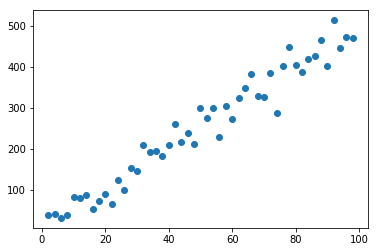

In [256]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [257]:
params = [1,1]
cost_function(x,y, params)

27122.524159317683

### Running the Gradient Descent

In [258]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)


theta0 = 1.1216183902771597 | theta1 = 8.961752185973726 | curr_cost = 26089.802976462663
theta0 = 1.0043112439409414 | theta1 = 1.1555864920111611 | curr_cost = 25097.057149686047
theta0 = 1.1212594527114017 | theta1 = 8.809148086484559 | curr_cost = 24142.739280189544
theta0 = 1.0085306447223978 | theta1 = 1.3051492776375149 | curr_cost = 23225.361867154574
theta0 = 1.1209894382835988 | theta1 = 8.662449974547288 | curr_cost = 22343.494989162205
theta0 = 1.0126617356613696 | theta1 = 1.4489215277688778 | curr_cost = 21495.764075362695
theta0 = 1.1208048830640662 | theta1 = 8.521429236690384 | curr_cost = 20680.847762920315
theta0 = 1.016707913310676 | theta1 = 1.5871273875252285 | curr_cost = 19897.47583739388
theta0 = 1.1207024572140925 | theta1 = 8.385866108799679 | curr_cost = 19144.427252842892
theta0 = 1.0206724427529335 | theta1 = 1.7199823256336204 | curr_cost = 18420.528228572977
theta0 = 1.1206789597954327 | theta1 = 8.255549333570189 | curr_cost = 17724.65041955401
theta0 =

theta0 = 1.9606812409656722 | theta1 = 5.006537672774588 | curr_cost = 441.9760621031036
theta0 = 1.961527092315015 | theta1 = 5.006524829425659 | curr_cost = 441.97486947406657
theta0 = 1.962372821454016 | theta1 = 5.00651204036713 | curr_cost = 441.97367719187116
theta0 = 1.9632184268272894 | theta1 = 5.006499201770317 | curr_cost = 441.9724852564166
theta0 = 1.9640639099952433 | theta1 = 5.006486415433996 | curr_cost = 441.97129366760197
theta0 = 1.964909269463386 | theta1 = 5.006473581548552 | curr_cost = 441.97010242532707
theta0 = 1.9657545067324111 | theta1 = 5.006460797972243 | curr_cost = 441.96891152949047
theta0 = 1.9665996203663643 | theta1 = 5.0064479687589545 | curr_cost = 441.9677209799915
theta0 = 1.9674446118085356 | theta1 = 5.006435187978959 | curr_cost = 441.96653077672954
theta0 = 1.9682894796792414 | theta1 = 5.006422363400088 | curr_cost = 441.965340919604
theta0 = 1.9691342253665909 | theta1 = 5.006409585451261 | curr_cost = 441.96415140851417
theta0 = 1.9699788

theta0 = 2.6130643034147334 | theta1 = 4.996652341522147 | curr_cost = 441.10774033575126
theta0 = 2.61381528486418 | theta1 = 4.99664096217958 | curr_cost = 441.10680023306696
theta0 = 2.614566157105034 | theta1 = 4.996629584491812 | curr_cost = 441.1058604037845
theta0 = 2.6153169201531763 | theta1 = 4.996618208458599 | curr_cost = 441.1049208478241
theta0 = 2.6160675740244863 | theta1 = 4.996606834079703 | curr_cost = 441.10398156510644
theta0 = 2.6168181187348405 | theta1 = 4.9965954613548815 | curr_cost = 441.10304255555246
theta0 = 2.617568554300113 | theta1 = 4.996584090283896 | curr_cost = 441.1021038190819
theta0 = 2.6183188807361755 | theta1 = 4.996572720866503 | curr_cost = 441.1011653556158
theta0 = 2.6190690980588984 | theta1 = 4.996561353102467 | curr_cost = 441.1002271650747
theta0 = 2.619819206284149 | theta1 = 4.996549986991541 | curr_cost = 441.0992892473795
theta0 = 2.620569205427792 | theta1 = 4.996538622533491 | curr_cost = 441.0983516024506
theta0 = 2.621319095505

theta0 = 3.220196667288533 | theta1 = 4.987452690643301 | curr_cost = 440.3923372533436
theta0 = 3.2208593588460204 | theta1 = 4.987442649124635 | curr_cost = 440.39160520502116
theta0 = 3.2215219540341336 | theta1 = 4.987432609066202 | curr_cost = 440.39087336959363
theta0 = 3.2221844528668866 | theta1 = 4.987422570467824 | curr_cost = 440.3901417469994
theta0 = 3.2228468553582914 | theta1 = 4.987412533329252 | curr_cost = 440.38941033717657
theta0 = 3.2235091615223586 | theta1 = 4.98740249765031 | curr_cost = 440.3886791400633
theta0 = 3.2241713713730955 | theta1 = 4.9873924634307505 | curr_cost = 440.38794815559737
theta0 = 3.224833484924509 | theta1 = 4.987382430670397 | curr_cost = 440.3872173837175
theta0 = 3.225495502190602 | theta1 = 4.987372399369001 | curr_cost = 440.38648682436127
theta0 = 3.2261574231853776 | theta1 = 4.9873623695263865 | curr_cost = 440.3857564774672
theta0 = 3.2268192479228346 | theta1 = 4.987352341142305 | curr_cost = 440.38502634297356
theta0 = 3.227480

theta0 = 3.6246053366692603 | theta1 = 4.981324836501353 | curr_cost = 439.96539481643686
theta0 = 3.625209218649378 | theta1 = 4.981315686102321 | curr_cost = 439.96478693201334
theta0 = 3.6258130128122787 | theta1 = 4.981306537033969 | curr_cost = 439.96417922437587
theta0 = 3.626416719170732 | theta1 = 4.981297389296067 | curr_cost = 439.96357169347226
theta0 = 3.6270203377375076 | theta1 = 4.981288242888458 | curr_cost = 439.9629643392517
theta0 = 3.627623868525371 | theta1 = 4.981279097810911 | curr_cost = 439.96235716166274
theta0 = 3.628227311547088 | theta1 = 4.981269954063272 | curr_cost = 439.9617501606536
theta0 = 3.6288306668154213 | theta1 = 4.981260811645305 | curr_cost = 439.9611433361733
theta0 = 3.6294339343431328 | theta1 = 4.981251670556864 | curr_cost = 439.9605366881704
theta0 = 3.6300371141429806 | theta1 = 4.981242530797705 | curr_cost = 439.95993021659353
theta0 = 3.6306402062277234 | theta1 = 4.981233392367685 | curr_cost = 439.95932392139173
theta0 = 3.6312432

theta0 = 4.099467490338928 | theta1 = 4.974129426918071 | curr_cost = 439.51468319998577
theta0 = 4.100002317314343 | theta1 = 4.974121322883847 | curr_cost = 439.5142063920425
theta0 = 4.100537066514598 | theta1 = 4.974113220028125 | curr_cost = 439.5137297227647
theta0 = 4.101071737951005 | theta1 = 4.9741051183507246 | curr_cost = 439.51325319211264
theta0 = 4.101606331634873 | theta1 = 4.974097017851484 | curr_cost = 439.5127768000455
theta0 = 4.102140847577507 | theta1 = 4.974088918530225 | curr_cost = 439.51230054652353
theta0 = 4.102675285790213 | theta1 = 4.974080820386779 | curr_cost = 439.51182443150606
theta0 = 4.103209646284296 | theta1 = 4.974072723420976 | curr_cost = 439.51134845495307
theta0 = 4.103743929071056 | theta1 = 4.9740646276326395 | curr_cost = 439.510872616824
theta0 = 4.104278134161794 | theta1 = 4.974056533021606 | curr_cost = 439.51039691707865
theta0 = 4.104812261567809 | theta1 = 4.974048439587697 | curr_cost = 439.50992135567714
theta0 = 4.1053463113003

theta0 = 4.438009452819239 | theta1 = 4.96899962648578 | curr_cost = 439.22673715827193
theta0 = 4.438495048630134 | theta1 = 4.968992268433084 | curr_cost = 439.22634409113334
theta0 = 4.438980573825123 | theta1 = 4.968984911450399 | curr_cost = 439.2259511383068
theta0 = 4.4394660284144765 | theta1 = 4.968977555537581 | curr_cost = 439.22555829975954
theta0 = 4.43995141240846 | theta1 = 4.968970200694462 | curr_cost = 439.2251655754578
theta0 = 4.4404367258173405 | theta1 = 4.968962846920899 | curr_cost = 439.22477296536886
theta0 = 4.440921968651383 | theta1 = 4.968955494216725 | curr_cost = 439.224380469459
theta0 = 4.44140714092085 | theta1 = 4.9689481425817945 | curr_cost = 439.2239880876953
theta0 = 4.441892242636003 | theta1 = 4.968940792015942 | curr_cost = 439.2235958200447
theta0 = 4.442377273807103 | theta1 = 4.968933442519022 | curr_cost = 439.2232036664739
theta0 = 4.442862234444408 | theta1 = 4.968926094090871 | curr_cost = 439.22281162694946
theta0 = 4.443347124558175 |

theta0 = 4.858738461467367 | theta1 = 4.962624476313475 | curr_cost = 438.9076080128819
theta0 = 4.859162874378242 | theta1 = 4.9626180453424995 | curr_cost = 438.90730775525464
theta0 = 4.8595872255705 | theta1 = 4.962611615306729 | curr_cost = 438.907007584949
theta0 = 4.860011515053116 | theta1 = 4.962605186206016 | curr_cost = 438.906707501939
theta0 = 4.8604357428350635 | theta1 = 4.962598758040237 | curr_cost = 438.90640750619974
theta0 = 4.860859908925315 | theta1 = 4.962592330809241 | curr_cost = 438.9061075977054
theta0 = 4.861284013332843 | theta1 = 4.96258590451291 | curr_cost = 438.9058077764311
theta0 = 4.8617080560666155 | theta1 = 4.962579479151088 | curr_cost = 438.9055080423508
theta0 = 4.862132037135603 | theta1 = 4.96257305472366 | curr_cost = 438.9052083954398
theta0 = 4.862555956548771 | theta1 = 4.96256663123047 | curr_cost = 438.90490883567236
theta0 = 4.8629798143150875 | theta1 = 4.962560208671402 | curr_cost = 438.90460936302316
theta0 = 4.863403610443516 | th

theta0 = 5.124690058586248 | theta1 = 4.958594610686558 | curr_cost = 438.7280160311831
theta0 = 5.12507579650766 | theta1 = 4.958588765743311 | curr_cost = 438.7277680027063
theta0 = 5.125461478334615 | theta1 = 4.958582921650051 | curr_cost = 438.7275200463614
theta0 = 5.125847104075272 | theta1 = 4.958577078406637 | curr_cost = 438.72727216212786
theta0 = 5.126232673737788 | theta1 = 4.958571236012964 | curr_cost = 438.7270243499839
theta0 = 5.126618187330316 | theta1 = 4.958565394468888 | curr_cost = 438.7267766099091
theta0 = 5.127003644861011 | theta1 = 4.958559553774306 | curr_cost = 438.72652894188246
theta0 = 5.127389046338025 | theta1 = 4.958553713929075 | curr_cost = 438.7262813458826
theta0 = 5.12777439176951 | theta1 = 4.958547874933092 | curr_cost = 438.72603382188925
theta0 = 5.128159681163615 | theta1 = 4.958542036786211 | curr_cost = 438.72578636988106
theta0 = 5.128544914528491 | theta1 = 4.95853619948833 | curr_cost = 438.7255389898371
theta0 = 5.1289300918722835 | t

theta0 = 5.455188641381639 | theta1 = 4.953586688594794 | curr_cost = 438.5287307691992
theta0 = 5.455526317816126 | theta1 = 4.953581571909377 | curr_cost = 438.52854069709576
theta0 = 5.455863945145315 | theta1 = 4.953576455968052 | curr_cost = 438.528350680269
theta0 = 5.456201523376346 | theta1 = 4.953571340770675 | curr_cost = 438.5281607187035
theta0 = 5.4565390525163595 | theta1 = 4.953566226317173 | curr_cost = 438.52797081238265
theta0 = 5.456876532572494 | theta1 = 4.953561112607405 | curr_cost = 438.52778096129083
theta0 = 5.457213963551888 | theta1 = 4.953555999641294 | curr_cost = 438.52759116541154
theta0 = 5.457551345461678 | theta1 = 4.9535508874187 | curr_cost = 438.52740142472885
theta0 = 5.457888678309001 | theta1 = 4.953545775939548 | curr_cost = 438.52721173922674
theta0 = 5.458225962100989 | theta1 = 4.953540665203698 | curr_cost = 438.5270221088892
theta0 = 5.458563196844777 | theta1 = 4.953535555211072 | curr_cost = 438.52683253370043
theta0 = 5.4589003825474975

theta0 = 5.760409564729925 | theta1 = 4.948961789474264 | curr_cost = 438.36820690568476
theta0 = 5.760702855584019 | theta1 = 4.948957345347049 | curr_cost = 438.36806351731923
theta0 = 5.7609961037874164 | theta1 = 4.948952901866097 | curr_cost = 438.36792017065386
theta0 = 5.761289309346321 | theta1 = 4.948948459031328 | curr_cost = 438.36777686567706
theta0 = 5.761582472266933 | theta1 = 4.948944016842635 | curr_cost = 438.3676336023761
theta0 = 5.7618755925554535 | theta1 = 4.948939575299936 | curr_cost = 438.3674903807391
theta0 = 5.762168670218082 | theta1 = 4.948935134403125 | curr_cost = 438.3673472007542
theta0 = 5.762461705261017 | theta1 = 4.9489306941521205 | curr_cost = 438.36720406240863
theta0 = 5.762754697690457 | theta1 = 4.948926254546818 | curr_cost = 438.3670609656911
theta0 = 5.763047647512598 | theta1 = 4.948921815587131 | curr_cost = 438.3669179105891
theta0 = 5.763340554733636 | theta1 = 4.948917377272959 | curr_cost = 438.36677489709035
theta0 = 5.763633419359

theta0 = 5.963553295688136 | theta1 = 4.945883628081063 | curr_cost = 438.2738858817194
theta0 = 5.9638170451454515 | theta1 = 4.945879631583639 | curr_cost = 438.27376992390424
theta0 = 5.9640807562480145 | theta1 = 4.945875635667395 | curr_cost = 438.27365399981227
theta0 = 5.964344429001404 | theta1 = 4.945871640332238 | curr_cost = 438.27353810943345
theta0 = 5.9646080634111955 | theta1 = 4.9458676455780894 | curr_cost = 438.2734222527578
theta0 = 5.964871659482966 | theta1 = 4.945863651404861 | curr_cost = 438.27330642977597
theta0 = 5.96513521722229 | theta1 = 4.9458596578124725 | curr_cost = 438.27319064047776
theta0 = 5.965398736634742 | theta1 = 4.945855664800834 | curr_cost = 438.2730748848534
theta0 = 5.965662217725896 | theta1 = 4.945851672369866 | curr_cost = 438.27295916289347
theta0 = 5.965925660501324 | theta1 = 4.94584768051948 | curr_cost = 438.2728434745878
theta0 = 5.966189064966599 | theta1 = 4.945843689249594 | curr_cost = 438.27272781992707
theta0 = 5.96645243112

theta0 = 6.162755426954795 | theta1 = 4.942865192281855 | curr_cost = 438.19110989728654
theta0 = 6.162990208207326 | theta1 = 4.942861634728864 | curr_cost = 438.19101801248013
theta0 = 6.163224955317696 | theta1 = 4.942858077693219 | curr_cost = 438.1909261543958
theta0 = 6.163459668290868 | theta1 = 4.94285452117484 | curr_cost = 438.19083432302574
theta0 = 6.163694347131808 | theta1 = 4.9428509651736565 | curr_cost = 438.1907425183626
theta0 = 6.163928991845479 | theta1 = 4.942847409689588 | curr_cost = 438.19065074039725
theta0 = 6.164163602436844 | theta1 = 4.9428438547225655 | curr_cost = 438.1905589891234
theta0 = 6.164398178910864 | theta1 = 4.942840300272506 | curr_cost = 438.1904672645328
theta0 = 6.164632721272502 | theta1 = 4.942836746339344 | curr_cost = 438.19037556661766
theta0 = 6.164867229526719 | theta1 = 4.942833192922993 | curr_cost = 438.1902838953702
theta0 = 6.165101703678473 | theta1 = 4.94282964002339 | curr_cost = 438.19019225078273
theta0 = 6.165336143732723

theta0 = 6.3684297159534315 | theta1 = 4.93974868628394 | curr_cost = 438.115738144798
theta0 = 6.368634587812501 | theta1 = 4.939745581936862 | curr_cost = 438.11566817969305
theta0 = 6.368839429878867 | theta1 = 4.939742478041226 | curr_cost = 438.11559823493536
theta0 = 6.369044242156863 | theta1 = 4.939739374596958 | curr_cost = 438.1155283105188
theta0 = 6.36924902465082 | theta1 = 4.9397362716040005 | curr_cost = 438.1154584064381
theta0 = 6.369453777365069 | theta1 = 4.939733169062281 | curr_cost = 438.1153885226869
theta0 = 6.369658500303942 | theta1 = 4.939730066971737 | curr_cost = 438.11531865925934
theta0 = 6.369863193471767 | theta1 = 4.939726965332304 | curr_cost = 438.1152488161494
theta0 = 6.370067856872875 | theta1 = 4.9397238641439145 | curr_cost = 438.1151789933514
theta0 = 6.370272490511593 | theta1 = 4.939720763406503 | curr_cost = 438.1151091908593
theta0 = 6.370477094392251 | theta1 = 4.939717663120005 | curr_cost = 438.1150394086673
theta0 = 6.3706816685191745 |

theta0 = 6.517679885394609 | theta1 = 4.9374871539819765 | curr_cost = 438.0674645853878
theta0 = 6.517863053121073 | theta1 = 4.93748437850955 | curr_cost = 438.067408659256
theta0 = 6.518046194211074 | theta1 = 4.937481603440734 | curr_cost = 438.06735274938796
theta0 = 6.518229308668485 | theta1 = 4.937478828775474 | curr_cost = 438.0672968557803
theta0 = 6.51841239649718 | theta1 = 4.937476054513707 | curr_cost = 438.0672409784275
theta0 = 6.518595457701029 | theta1 = 4.937473280655377 | curr_cost = 438.0671851173252
theta0 = 6.518778492283907 | theta1 = 4.937470507200425 | curr_cost = 438.06712927246843
theta0 = 6.5189615002496835 | theta1 = 4.937467734148792 | curr_cost = 438.0670734438526
theta0 = 6.51914448160223 | theta1 = 4.937464961500418 | curr_cost = 438.06701763147277
theta0 = 6.5193274363454154 | theta1 = 4.937462189255249 | curr_cost = 438.06696183532426
theta0 = 6.519510364483111 | theta1 = 4.937459417413219 | curr_cost = 438.0669060554026
theta0 = 6.519693266019184 | 

theta0 = 6.654552511240494 | theta1 = 4.935413173994118 | curr_cost = 438.0279413807205
theta0 = 6.654715774791086 | theta1 = 4.935410700122275 | curr_cost = 438.0278969487734
theta0 = 6.654879014599703 | theta1 = 4.935408226610163 | curr_cost = 438.0278525297474
theta0 = 6.655042230669798 | theta1 = 4.935405753457774 | curr_cost = 438.0278081236397
theta0 = 6.655205423004823 | theta1 = 4.935403280665014 | curr_cost = 438.0277637304464
theta0 = 6.655368591608229 | theta1 = 4.935400808231868 | curr_cost = 438.02771935016335
theta0 = 6.655531736483468 | theta1 = 4.935398336158248 | curr_cost = 438.0276749827872
theta0 = 6.65569485763399 | theta1 = 4.935395864444138 | curr_cost = 438.0276306283139
theta0 = 6.6558579550632455 | theta1 = 4.93539339308945 | curr_cost = 438.0275862867401
theta0 = 6.656021028774684 | theta1 = 4.935390922094166 | curr_cost = 438.02754195806136
theta0 = 6.656184078771754 | theta1 = 4.935388451458202 | curr_cost = 438.02749764227457
theta0 = 6.656347105057905 | t

theta0 = 6.802265914583838 | theta1 = 4.933174927737221 | curr_cost = 437.99038321856005
theta0 = 6.802407697480131 | theta1 = 4.933172779353733 | curr_cost = 437.99034970932115
theta0 = 6.802549459758191 | theta1 = 4.933170631282662 | curr_cost = 437.99031620982754
theta0 = 6.802691201421015 | theta1 = 4.93316848352397 | curr_cost = 437.9902827200763
theta0 = 6.8028329224716035 | theta1 = 4.933166336077604 | curr_cost = 437.99024924006466
theta0 = 6.802974622912952 | theta1 = 4.933164188943525 | curr_cost = 437.99021576978987
theta0 = 6.803116302748059 | theta1 = 4.933162042121682 | curr_cost = 437.9901823092488
theta0 = 6.803257961979919 | theta1 = 4.933159895612035 | curr_cost = 437.99014885843866
theta0 = 6.80339960061153 | theta1 = 4.9331577494145336 | curr_cost = 437.9901154173567
theta0 = 6.803541218645887 | theta1 = 4.933155603529136 | curr_cost = 437.9900819860004
theta0 = 6.803682816085986 | theta1 = 4.933153457955796 | curr_cost = 437.9900485643663
theta0 = 6.80382439293482 

theta0 = 6.904286821941413 | theta1 = 4.931629042876065 | curr_cost = 437.96753125839
theta0 = 6.904413768839126 | theta1 = 4.931627119296939 | curr_cost = 437.967504394985
theta0 = 6.904540697276074 | theta1 = 4.931625195997552 | curr_cost = 437.96747753939263
theta0 = 6.904667607254941 | theta1 = 4.931623272977843 | curr_cost = 437.96745069161034
theta0 = 6.904794498778413 | theta1 = 4.931621350237791 | curr_cost = 437.9674238516357
theta0 = 6.904921371849172 | theta1 = 4.931619427777338 | curr_cost = 437.9673970194671
theta0 = 6.905048226469902 | theta1 = 4.931617505596458 | curr_cost = 437.96737019510186
theta0 = 6.905175062643286 | theta1 = 4.931615583695099 | curr_cost = 437.9673433785373
theta0 = 6.905301880372007 | theta1 = 4.931613662073229 | curr_cost = 437.9673165697719
theta0 = 6.905428679658747 | theta1 = 4.931611740730801 | curr_cost = 437.9672897688029
theta0 = 6.9055554605061875 | theta1 = 4.931609819667777 | curr_cost = 437.9672629756284
theta0 = 6.90568222291701 | the

theta0 = 6.996654754380255 | theta1 = 4.930229425953291 | curr_cost = 437.94901789564335
theta0 = 6.996768269026187 | theta1 = 4.930227705908092 | curr_cost = 437.94899641631645
theta0 = 6.996881767164688 | theta1 = 4.930225986113009 | curr_cost = 437.9489749432359
theta0 = 6.996995248798159 | theta1 = 4.930224266568036 | curr_cost = 437.9489534764003
theta0 = 6.9971087139289985 | theta1 = 4.930222547273106 | curr_cost = 437.94893201580754
theta0 = 6.997222162559607 | theta1 = 4.9302208282282125 | curr_cost = 437.9489105614564
theta0 = 6.997335594692385 | theta1 = 4.930219109433289 | curr_cost = 437.9488891133442
theta0 = 6.99744901032973 | theta1 = 4.93021739088833 | curr_cost = 437.9488676714697
theta0 = 6.9975624094740425 | theta1 = 4.93021567259327 | curr_cost = 437.9488462358309
theta0 = 6.99767579212772 | theta1 = 4.930213954548099 | curr_cost = 437.94882480642605
theta0 = 6.99778915829316 | theta1 = 4.930212236752756 | curr_cost = 437.9488033832534
theta0 = 6.9979025079727615 | 

theta0 = 7.102210613306175 | theta1 = 4.9286299772858895 | curr_cost = 437.93039363409724
theta0 = 7.102308777896774 | theta1 = 4.928628489834368 | curr_cost = 437.93037757109977
theta0 = 7.102406928212165 | theta1 = 4.928627002599141 | curr_cost = 437.9303615127736
theta0 = 7.102505064254423 | theta1 = 4.928625515580202 | curr_cost = 437.93034545911763
theta0 = 7.102603186025624 | theta1 = 4.928624028777494 | curr_cost = 437.93032941013035
theta0 = 7.1027012935278435 | theta1 = 4.928622542191012 | curr_cost = 437.9303133658105
theta0 = 7.102799386763156 | theta1 = 4.928621055820698 | curr_cost = 437.93029732615656
theta0 = 7.102897465733637 | theta1 = 4.928619569666547 | curr_cost = 437.93028129116743
theta0 = 7.10299553044136 | theta1 = 4.9286180837285 | curr_cost = 437.93026526084157
theta0 = 7.1030935808884 | theta1 = 4.928616598006554 | curr_cost = 437.9302492351776
theta0 = 7.10319161707683 | theta1 = 4.928615112500649 | curr_cost = 437.93023321417445
theta0 = 7.103289639008724 |

theta0 = 7.193577536740978 | theta1 = 4.927245528280225 | curr_cost = 437.9164537426725
theta0 = 7.193662414647687 | theta1 = 4.927244242156876 | curr_cost = 437.91644173369053
theta0 = 7.193747280211351 | theta1 = 4.927242956220557 | curr_cost = 437.9164297282009
theta0 = 7.193832133433768 | theta1 = 4.927241670471239 | curr_cost = 437.9164177262027
theta0 = 7.19391697431673 | theta1 = 4.927240384908898 | curr_cost = 437.9164057276949
theta0 = 7.194001802862033 | theta1 = 4.927239099533503 | curr_cost = 437.916393732677
theta0 = 7.19408661907147 | theta1 = 4.927237814345031 | curr_cost = 437.9163817411469
theta0 = 7.194171422946836 | theta1 = 4.927236529343451 | curr_cost = 437.9163697531046
theta0 = 7.194256214489924 | theta1 = 4.927235244528738 | curr_cost = 437.9163577685485
theta0 = 7.194340993702528 | theta1 = 4.927233959900864 | curr_cost = 437.9163457874778
theta0 = 7.19442576058644 | theta1 = 4.927232675459802 | curr_cost = 437.91633380989134
theta0 = 7.194510515143453 | theta

theta0 = 7.272357615094567 | theta1 = 4.926051803056226 | curr_cost = 437.90605898253204
theta0 = 7.272431036710983 | theta1 = 4.926050690525787 | curr_cost = 437.9060499965662
theta0 = 7.272504447650342 | theta1 = 4.926049578157125 | curr_cost = 437.90604101321395
theta0 = 7.272577847914198 | theta1 = 4.926048465950233 | curr_cost = 437.90603203247406
theta0 = 7.2726512375041015 | theta1 = 4.926047353905071 | curr_cost = 437.90602305434595
theta0 = 7.272724616421606 | theta1 = 4.926046242021633 | curr_cost = 437.90601407882883
theta0 = 7.272797984668264 | theta1 = 4.926045130299876 | curr_cost = 437.9060051059222
theta0 = 7.272871342245627 | theta1 = 4.926044018739799 | curr_cost = 437.9059961356248
theta0 = 7.272944689155246 | theta1 = 4.926042907341353 | curr_cost = 437.90598716793636
theta0 = 7.273018025398672 | theta1 = 4.926041796104543 | curr_cost = 437.9059782028558
theta0 = 7.273091350977456 | theta1 = 4.926040685029313 | curr_cost = 437.9059692403827
theta0 = 7.27316466589315

theta0 = 7.325779975363749 | theta1 = 4.9252423139022214 | curr_cost = 437.8998661546566
theta0 = 7.325845628238624 | theta1 = 4.925241319088636 | curr_cost = 437.8998589696968
theta0 = 7.325911271566182 | theta1 = 4.925240324419704 | curr_cost = 437.8998517868257
theta0 = 7.325976905347811 | theta1 = 4.9252393298954305 | curr_cost = 437.899844606044
theta0 = 7.326042529584899 | theta1 = 4.925238335515769 | curr_cost = 437.8998374273506
theta0 = 7.326108144278835 | theta1 = 4.925237341280724 | curr_cost = 437.8998302507449
theta0 = 7.326173749431005 | theta1 = 4.925236347190251 | curr_cost = 437.89982307622626
theta0 = 7.326239345042799 | theta1 = 4.925235353244349 | curr_cost = 437.8998159037939
theta0 = 7.326304931115603 | theta1 = 4.92523435944298 | curr_cost = 437.89980873344774
theta0 = 7.326370507650804 | theta1 = 4.925233365786137 | curr_cost = 437.8998015651869
theta0 = 7.326436074649789 | theta1 = 4.925232372273788 | curr_cost = 437.89979439901043
theta0 = 7.326501632113945 | 

theta0 = 7.371371575189264 | theta1 = 4.924551481348471 | curr_cost = 437.89512826069864
theta0 = 7.371430598080856 | theta1 = 4.924550586996546 | curr_cost = 437.8951224536182
theta0 = 7.371489612389271 | theta1 = 4.9245496927746855 | curr_cost = 437.8951166482268
theta0 = 7.371548618115757 | theta1 = 4.9245487986828556 | curr_cost = 437.8951108445236
theta0 = 7.371607615261561 | theta1 = 4.924547904721054 | curr_cost = 437.895105042508
theta0 = 7.371666603827932 | theta1 = 4.9245470108892455 | curr_cost = 437.8950992421801
theta0 = 7.371725583816118 | theta1 = 4.924546117187427 | curr_cost = 437.8950934435388
theta0 = 7.371784555227365 | theta1 = 4.924545223615564 | curr_cost = 437.89508764658393
theta0 = 7.371843518062922 | theta1 = 4.924544330173652 | curr_cost = 437.89508185131496
theta0 = 7.371902472324034 | theta1 = 4.924543436861659 | curr_cost = 437.8950760577315
theta0 = 7.371961418011949 | theta1 = 4.924542543679578 | curr_cost = 437.89507026583306
theta0 = 7.372020355127915

theta0 = 7.4258476294160545 | theta1 = 4.923726025961861 | curr_cost = 437.8901278538851
theta0 = 7.4258987303367086 | theta1 = 4.923725251648619 | curr_cost = 437.89012350102905
theta0 = 7.425949823826207 | theta1 = 4.923724477447977 | curr_cost = 437.89011914943865
theta0 = 7.426000909885632 | theta1 = 4.923723703359921 | curr_cost = 437.89011479911403
theta0 = 7.426051988516063 | theta1 = 4.923722929384433 | curr_cost = 437.8901104500542
theta0 = 7.42610305971858 | theta1 = 4.9237221555214985 | curr_cost = 437.89010610225955
theta0 = 7.426154123494263 | theta1 = 4.9237213817711 | curr_cost = 437.89010175572895
theta0 = 7.426205179844193 | theta1 = 4.92372060813322 | curr_cost = 437.89009741046266
theta0 = 7.42625622876945 | theta1 = 4.923719834607844 | curr_cost = 437.8900930664601
theta0 = 7.426307270271113 | theta1 = 4.923719061194955 | curr_cost = 437.8900887237205
theta0 = 7.426358304350261 | theta1 = 4.923718287894536 | curr_cost = 437.8900843822443
theta0 = 7.426409331007974 |

theta0 = 7.455304341458133 | theta1 = 4.923279679361105 | curr_cost = 437.88772367819325
theta0 = 7.455351158749584 | theta1 = 4.923278969956098 | curr_cost = 437.8877200245224
theta0 = 7.455397969232812 | theta1 = 4.9232782606542616 | curr_cost = 437.88771637191377
theta0 = 7.4554447729088045 | theta1 = 4.9232775514555644 | curr_cost = 437.88771272036763
theta0 = 7.455491569778552 | theta1 = 4.923276842360009 | curr_cost = 437.88770906988333
theta0 = 7.455538359843044 | theta1 = 4.923276133367561 | curr_cost = 437.8877054204607
theta0 = 7.455585143103271 | theta1 = 4.923275424478224 | curr_cost = 437.8877017720994
theta0 = 7.455631919560222 | theta1 = 4.923274715691967 | curr_cost = 437.88769812479904
theta0 = 7.455678689214887 | theta1 = 4.92327400700879 | curr_cost = 437.88769447855964
theta0 = 7.455725452068254 | theta1 = 4.923273298428664 | curr_cost = 437.88769083338025
theta0 = 7.455772208121313 | theta1 = 4.923272589951587 | curr_cost = 437.8876871892612
theta0 = 7.455818957375

theta0 = 7.49504806964912 | theta1 = 4.922677457431034 | curr_cost = 437.8848132722822
theta0 = 7.495089107361559 | theta1 = 4.922676835601839 | curr_cost = 437.88481046501903
theta0 = 7.495130139106246 | theta1 = 4.922676213863077 | curr_cost = 437.8848076585719
theta0 = 7.4951711648840496 | theta1 = 4.9226755922147225 | curr_cost = 437.88480485294104
theta0 = 7.495212184695837 | theta1 = 4.922674970656776 | curr_cost = 437.8848020481261
theta0 = 7.495253198542476 | theta1 = 4.92267434918921 | curr_cost = 437.88479924412707
theta0 = 7.495294206424834 | theta1 = 4.922673727812026 | curr_cost = 437.8847964409433
theta0 = 7.495335208343778 | theta1 = 4.9226731065251945 | curr_cost = 437.8847936385748
theta0 = 7.495376204300175 | theta1 = 4.922672485328722 | curr_cost = 437.88479083702157
theta0 = 7.495417194294893 | theta1 = 4.922671864222573 | curr_cost = 437.8847880362826
theta0 = 7.495458178328798 | theta1 = 4.922671243206757 | curr_cost = 437.8847852363584
theta0 = 7.495499156402758 

theta0 = 7.531499002829882 | theta1 = 4.922125129998951 | curr_cost = 437.8824806459793
theta0 = 7.531534739805376 | theta1 = 4.922124588489857 | curr_cost = 437.8824785170931
theta0 = 7.531570471583956 | theta1 = 4.922124047059505 | curr_cost = 437.8824763888258
theta0 = 7.53160619816638 | theta1 = 4.922123505707892 | curr_cost = 437.8824742611777
theta0 = 7.531641919553404 | theta1 = 4.922122964434999 | curr_cost = 437.88247213414826
theta0 = 7.5316776357457815 | theta1 = 4.922122423240824 | curr_cost = 437.8824700077375
theta0 = 7.531713346744269 | theta1 = 4.922121882125345 | curr_cost = 437.8824678819449
theta0 = 7.531749052549622 | theta1 = 4.92212134108856 | curr_cost = 437.88246575677067
theta0 = 7.531784753162595 | theta1 = 4.922120800130448 | curr_cost = 437.88246363221447
theta0 = 7.531820448583944 | theta1 = 4.922120259251009 | curr_cost = 437.88246150827626
theta0 = 7.531856138814423 | theta1 = 4.922119718450218 | curr_cost = 437.88245938495555
theta0 = 7.531891823854788 |

theta0 = 7.560989019183615 | theta1 = 4.921678278750347 | curr_cost = 437.8808291828339
theta0 = 7.561020467686754 | theta1 = 4.921677802222876 | curr_cost = 437.88082753422816
theta0 = 7.561051911616616 | theta1 = 4.921677325764703 | curr_cost = 437.8808258861017
theta0 = 7.561083350973864 | theta1 = 4.921676849375817 | curr_cost = 437.8808242384548
theta0 = 7.561114785759165 | theta1 = 4.921676373056208 | curr_cost = 437.88082259128663
theta0 = 7.561146215973183 | theta1 = 4.9216758968058665 | curr_cost = 437.880820944598
theta0 = 7.561177641616583 | theta1 = 4.921675420624781 | curr_cost = 437.8808192983881
theta0 = 7.561209062690029 | theta1 = 4.921674944512942 | curr_cost = 437.8808176526567
theta0 = 7.561240479194186 | theta1 = 4.921674468470342 | curr_cost = 437.8808160074039
theta0 = 7.561271891129719 | theta1 = 4.921673992496965 | curr_cost = 437.88081436263
theta0 = 7.561303298497292 | theta1 = 4.921673516592809 | curr_cost = 437.880812718334
theta0 = 7.56133470129757 | theta

theta0 = 7.588319018498147 | theta1 = 4.9212641574364895 | curr_cost = 437.87948691148506
theta0 = 7.588346492641113 | theta1 = 4.921263741131021 | curr_cost = 437.87948565323995
theta0 = 7.588373962788758 | theta1 = 4.921263324886091 | curr_cost = 437.87948439536115
theta0 = 7.588401428941662 | theta1 = 4.921262908701694 | curr_cost = 437.8794831378478
theta0 = 7.588428891100406 | theta1 = 4.9212624925778155 | curr_cost = 437.8794818807002
theta0 = 7.588456349265571 | theta1 = 4.921262076514454 | curr_cost = 437.87948062391854
theta0 = 7.588483803437738 | theta1 = 4.921261660511593 | curr_cost = 437.87947936750226
theta0 = 7.5885112536174875 | theta1 = 4.921261244569232 | curr_cost = 437.87947811145125
theta0 = 7.5885386998054 | theta1 = 4.921260828687354 | curr_cost = 437.8794768557654
theta0 = 7.588566142002056 | theta1 = 4.921260412865958 | curr_cost = 437.87947560044506
theta0 = 7.588593580208036 | theta1 = 4.921259997105025 | curr_cost = 437.8794743454897
theta0 = 7.5886210144239

theta0 = 7.607570824404334 | theta1 = 4.920972441982557 | curr_cost = 437.87865008939616
theta0 = 7.607595498927375 | theta1 = 4.92097206809869 | curr_cost = 437.8786490745166
theta0 = 7.6076201698622175 | theta1 = 4.920971694269188 | curr_cost = 437.87864805993263
theta0 = 7.607644837209384 | theta1 = 4.920971320494054 | curr_cost = 437.87864704564345
theta0 = 7.607669500969396 | theta1 = 4.920970946773271 | curr_cost = 437.8786460316493
theta0 = 7.607694161142776 | theta1 = 4.920970573106838 | curr_cost = 437.87864501794996
theta0 = 7.607718817730045 | theta1 = 4.920970199494741 | curr_cost = 437.8786440045456
theta0 = 7.607743470731724 | theta1 = 4.920969825936978 | curr_cost = 437.87864299143575
theta0 = 7.607768120148335 | theta1 = 4.920969452433535 | curr_cost = 437.87864197862075
theta0 = 7.6077927659804 | theta1 = 4.920969078984412 | curr_cost = 437.87864096609997
theta0 = 7.607817408228439 | theta1 = 4.92096870558959 | curr_cost = 437.87863995387397
theta0 = 7.607842046892975 

In [259]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 7.6088491531635 | theta1 = 4.92095307194236


### Plotting the regression line on newly obtained parameters from Gradient Descent

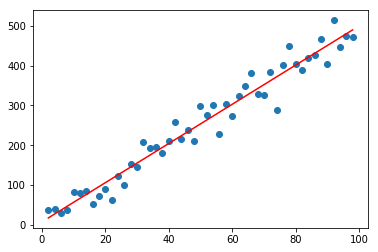

In [260]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [261]:
x = np.concatenate((x,[80]))

In [262]:
y = np.concatenate((y,[-300]))

In [263]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)


theta0 = 1.1146140224716166 | theta1 = 8.436757142254251 | curr_cost = 28845.635647938718
theta0 = 1.003379329690911 | theta1 = 0.8686080954309876 | curr_cost = 29688.585660795397


In [264]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 1.003379329690911 | theta1 = 0.8686080954309876


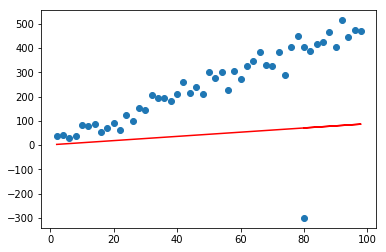

In [265]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')